# Proyecto UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

## Importación de paquetes

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

### Ignorar warnigs

In [150]:
warnings.filterwarnings("ignore")

## 1. Importación del dataset

In [151]:
# Mostramos el dataset
paises = pd.read_csv('data/paises.csv')
paises

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [152]:
paises.describe()

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. EDA&Preprocessing (2 puntos)

In [153]:
# Realiza un análisis exploratorio de los datos. ¿Puedes extraer alguna información?
# Realiza un preprocesado de los datos antes de pasar el siguiente apartado

### Primero para trabajar con las variables del proyecto, eliminaremos la columna de paises ya que no aprota mucha información y tiene demasiadas variables para cambiar sus datos de categoricos a numéricos

In [154]:

df = paises.drop('pais',axis=1)

### Luego Comporobamos que no existan valores Nulos

In [155]:
df.isnull().sum()

mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

#### No existen Nulos

### Ahora vamos a crear distintos mapas para el analisis de datos

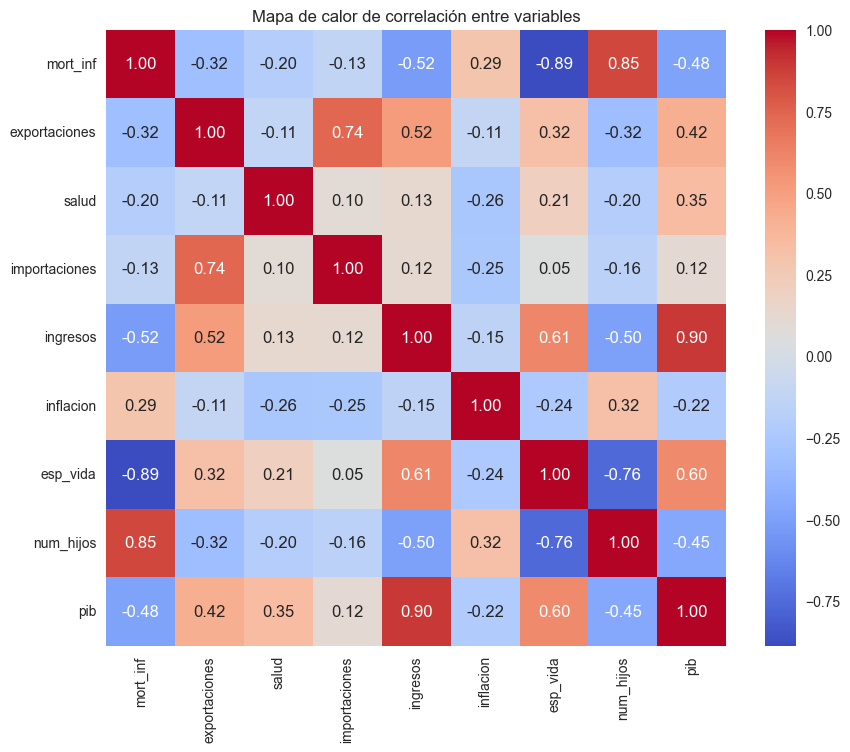

In [156]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables')
plt.show()

### Tras crear el heat map podemos observar como la mortalidad infantil está relacionada con el número de hijos que se tienen en el pais. Otra relación entre variables interesante es la esperenza de vida y los ingresos. 

## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica (4 puntos)

In [157]:
# Crea al menos un modelo no supervisado, entrénalo y visualiza los resultados. ¿Cuál es el número óptimo de clústers? ¿Por qué? Qué conclusiones extraemos?

### Primero crearemos un cluster utilizando el modelo de Kmeans

In [158]:
# Importamos la libreria
from sklearn.cluster import KMeans

### Luego realizamos un escalado de los datos

In [159]:
# Importamos la libreria
from sklearn.preprocessing import StandardScaler

# Escalamos el dataframe
sc = StandardScaler()

X = sc.fit_transform(df)

### Ahora calcularemos el mejor K para el cluster

###  Método Elbow

In [160]:
# Calculamos el mejor k
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

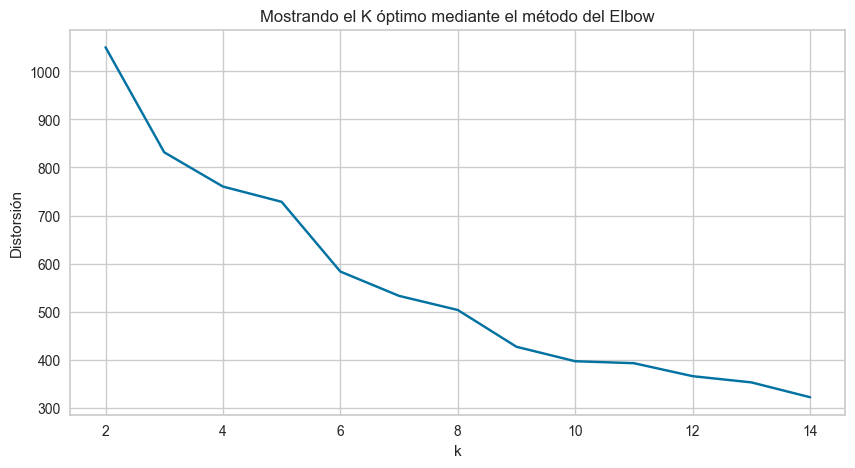

In [161]:
# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

### Tras realizar el método Elbow vemos que tenemos varias opciones a elgir para el valor de K, el cula podría ser 4,5 o 6 para salir de dudas utilizaremos un método mas preciso llamado Silhouette

### Método Silhouette

In [162]:
# Importamos la librería
from sklearn.metrics import silhouette_score

# Calculamos el mejor k
scores = list()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

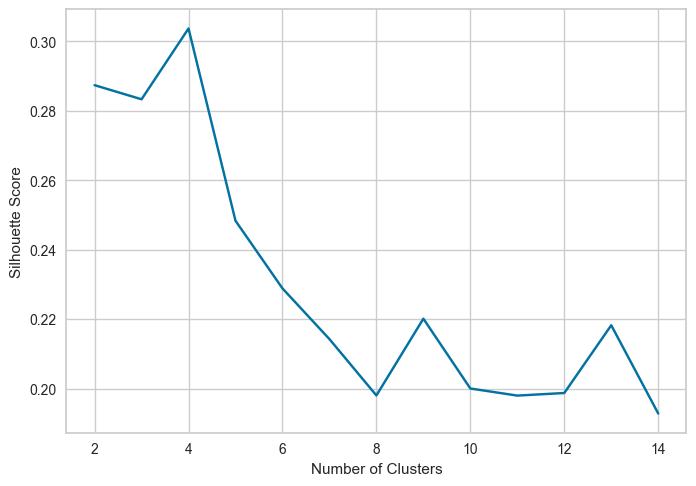

In [163]:
# Mostramos un gráfico para observar el k
plt.plot(list(range(2, 15)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### El método Silhouette nos muestra que el valor óptimo para K es 3

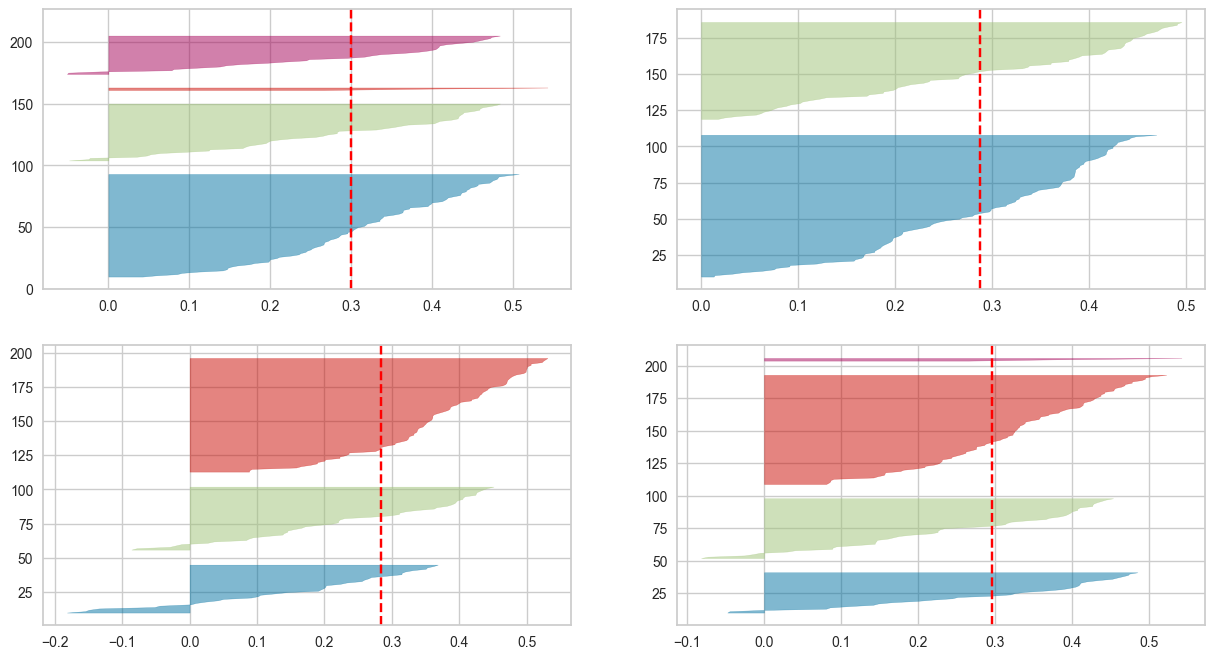

In [164]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 3, 4, 5 y 6 Ks

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-3, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)


### Una vez hemos obtenido el valor óptimo de K podemos empezar a generar el modelo


In [165]:
# Normalizamos los datos
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [166]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)

In [167]:
# Creación del Modelo
kmeans.fit(X_normalized)

KMeans(n_clusters=3, random_state=42)

In [168]:
# Creamos los labels para luego crar una gráfica
y_kmeans = kmeans.labels_

In [169]:
inertia_score = kmeans.inertia_

In [170]:
# Mostramos el score del Modelo
print(inertia_score)

831.5351582151588


In [171]:
# Creamos los labels para luego mostrar los cluster y sus paises
cluster_labels = kmeans.labels_

In [172]:
# Añadimos una nueva columna al dataframe con los clusters donde cada pais tendrá el numero de cluster asociado
paises['cluster'] = cluster_labels

In [173]:
# Mostralos los pclusters y los paises que contienen
for cluster_num in range(k):
    print(f"Cluster {cluster_num}:")
    print(paises[paises['cluster'] == cluster_num]['pais'])

Cluster 0:
1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: pais, Length: 86, dtype: object
Cluster 1:
7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand

## 4. PCA (2 puntos)

In [174]:
# ¿Tiene sentido la reducción de dimensionalidad de este dataset? Demúestralo y justifica tus respuestas.


In [175]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [176]:
scores2 = list()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    scores2.append(silhouette_score(X_pca, kmeans.labels_, metric='euclidean'))
    del(kmeans)

### Mostramos el gráfico para escoger el mejor K

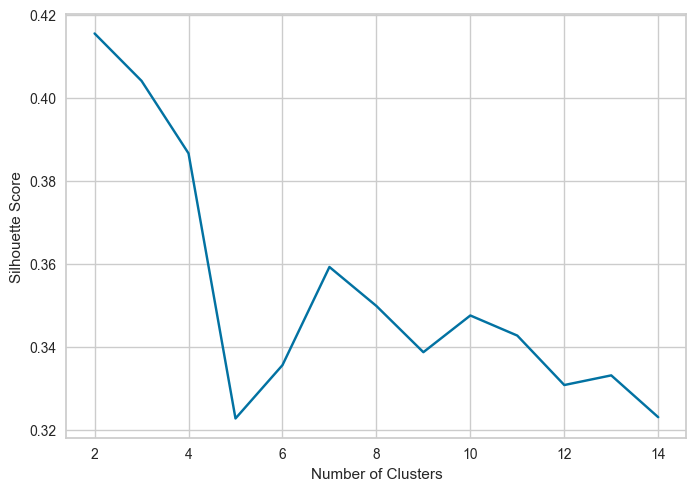

In [177]:
plt.plot(list(range(2, 15)), scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [178]:
# Adiestramos el modelo
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [179]:
inertia_score = kmeans.inertia_

In [180]:
# Mostramos el score
print(inertia_score)

371.03412968435333


### Como se puede observar el score a mejorado considerablemente con respecto al anterior modelo por lo que ha sido buena elección utilizar el método PCA

In [181]:

for cluster_num in range(k):
    print(f"Cluster {cluster_num}:")
    print(paises[paises['cluster'] == cluster_num]['pais'])

Cluster 0:
1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: pais, Length: 86, dtype: object
Cluster 1:
7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand

## 5. Conclusiones (2 puntos)

In [182]:
# ¿Qué información le podemos hacer llegar a Amancio?

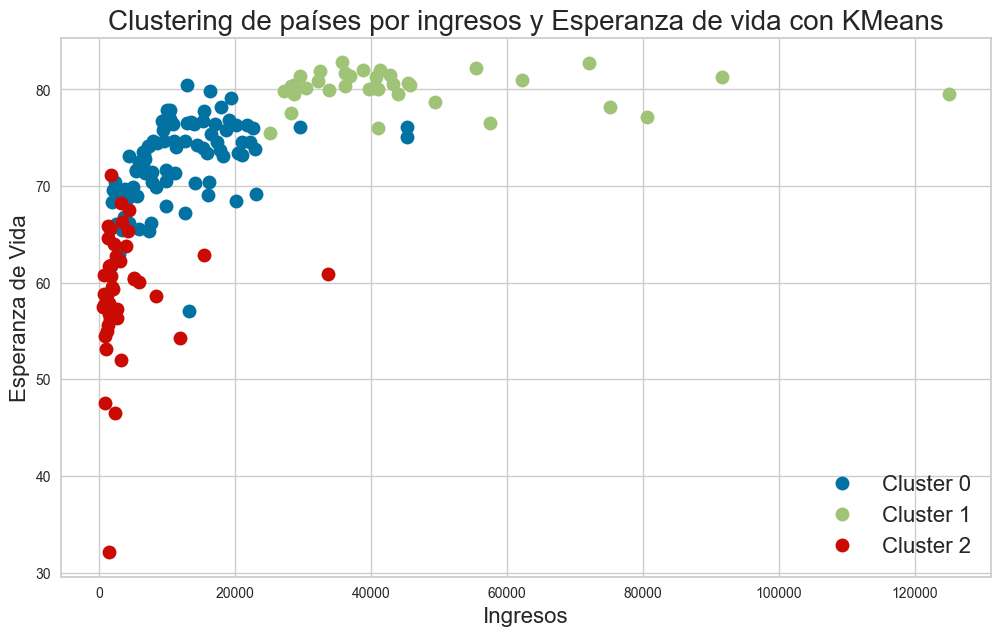

In [183]:

# Extraer las columnas que queremos
X = paises[['ingresos','esp_vida']]


plt.figure(figsize=(12, 7))




for cluster_num in range(k):
    plt.plot(X[y_kmeans == cluster_num]['ingresos'] + cluster_num , X[y_kmeans == cluster_num]['esp_vida'], marker='o', linestyle='', markersize=10, label=f'Cluster {cluster_num}')


plt.title('Clustering de países por ingresos y Esperanza de vida con KMeans',fontsize=20)
plt.xlabel('Ingresos',fontsize=16)
plt.ylabel('Esperanza de Vida',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.show()



### Según lo que se muestra en la gráfica el los paises con peor esperanza de vida e ingresos son aquellos situados en el cluster 2 el cual esta compuesto por paises como Afghanistan,Angola Benin.

### Ademas se puede observar en la gráfica como existe un pais que paraece tener unos ingresos y esperanza de vida muy bajos por lo que seria adecuado centrase en ese.

### Buscamos el pais que representa el punto en el gráfico

In [184]:
# Identificar el país con ingresos y esperanza de vida bajos
# Asignamos los límites de ingresos y esp_vida
threshold_income = 20000
threshold_life = 40
# Lo buscamos
for cluster_num in range(k):
    cluster_data = X[y_kmeans == cluster_num]  # Datos del clúster actual
    low_income_life = cluster_data[(cluster_data['ingresos'] < threshold_income) & (cluster_data['esp_vida'] < threshold_life)]
    if not low_income_life.empty:
        print(f"Países con bajos ingresos y esperanza de vida en el clúster {cluster_num}:")
        print(low_income_life)


Países con bajos ingresos y esperanza de vida en el clúster 2:
    ingresos  esp_vida
66      1500      32.1


In [185]:
# Al tener el número 66 lo buscamos en el dataframe
paises.iloc[66]

pais             Haiti
mort_inf         208.0
exportaciones     15.3
salud             6.91
importaciones     64.7
ingresos          1500
inflacion         5.45
esp_vida          32.1
num_hijos         3.33
pib                662
cluster              2
Name: 66, dtype: object

### En conclusión Haiti es uno de los paises que se debería centrar más para la ayuda económica ya que tiene un indice de mortalidad infanti muy elevada, una esperanza de vida muy baja y muy pocos ingresos